In [200]:
!pip install wordcloud
!pip install tensorflow

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import re
import nltk
import string
nltk.download('punkt')
from nltk.text import Text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sazha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Import Dataset**

In [201]:
df = pd.read_csv('E:\Anitha\Data_Glacier\GitHub\VC\Week9\Twitter Dataset\Twitter Hate Speech.csv')
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


**Data Information**

In [202]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


In [203]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [204]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [206]:
df.size

95886

**Check the missing value**

In [207]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

**Extracting the Target Attribute for Each Class and Visualize**

In [208]:
# Extract the Label Feature for Each Class
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


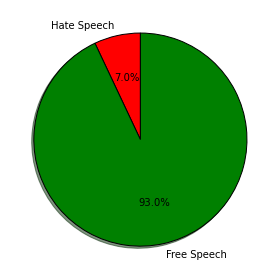

In [209]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

**Data Preprocessing**

**Lower Case**

In [210]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

**Remove Punctuation**

In [211]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

**Remove URLs**

In [212]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

**Removing tags**

In [213]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

**Preprocessing Opeartions**

**Word Cloud**

In [214]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [215]:
def tokenize(text):
    text = word_tokenize(text)
    return text

df['tweet'] = df['tweet'].apply(tokenize)


In [216]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS



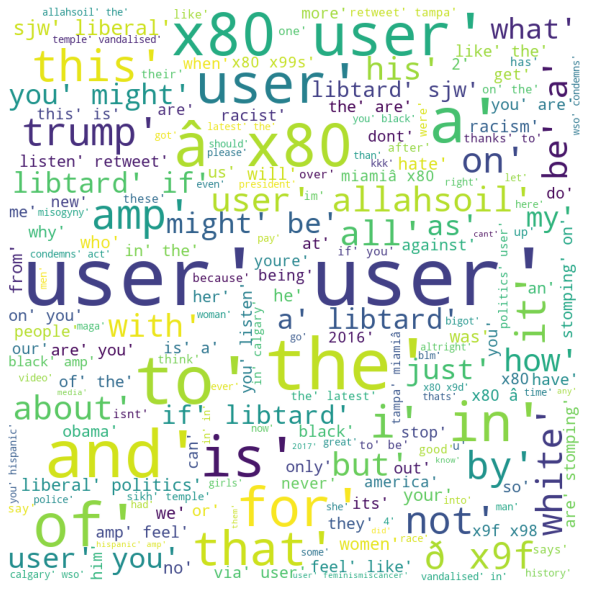

In [217]:
# WordCloud of Hate speech
hate_speech = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
     
    
    val = str(val)
 
    tokens = val.split()
     

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

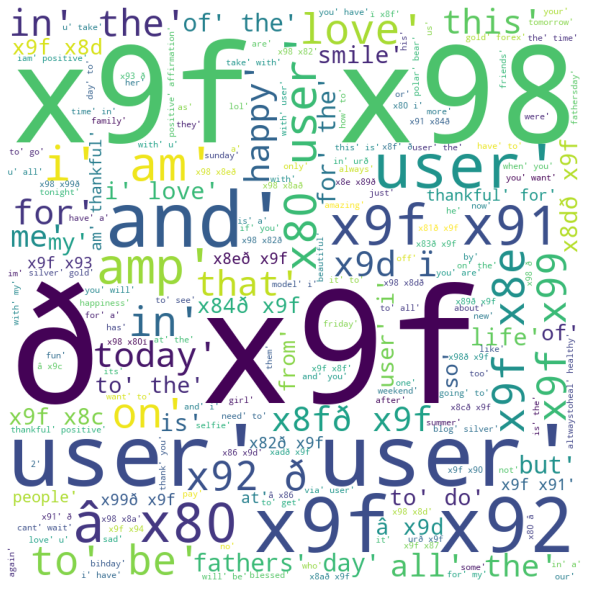

In [218]:
# WordCloud of free speech
free_speech = df[df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in free_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
         tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Feature Extraction**

**TF-IDF model**

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [220]:
vectorizer = TfidfVectorizer(max_features= 2000)

In [221]:
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

In [222]:
corpus = df['tweet']
text = vectorizer.fit_transform(corpus).toarray()

In [223]:
text.shape

(31962, 2000)

**Split the Dataset**

In [224]:
from sklearn.model_selection import train_test_split

**Split the dataset into train and test**

In [225]:
label = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=0)

**Training Data**

In [226]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (25569, 2000)
y_train (25569,)


**Testing Data**

In [227]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)


X_test (6393, 2000)
y_test (6393,)


**Build the model**

**Importing the Kera Libraries and Packages**

In [228]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, TimeDistributed, Conv1D, ZeroPadding1D, GRU
from tensorflow.keras.layers import Lambda, Input, Dropout, Masking, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [248]:
def cnn_lstm(input_dim, output_dim, dropout=0.2, n_layers=1):

    # Input data type
    dtype = 'float32'

    # ---- Network model ----
    input_data = Input(name='the_input', shape=input_dim, dtype=dtype)

    # 1 x 1D convolutional layers with strides 4
    x = Conv1D(filters=256, kernel_size=10, strides=4, name='conv_1')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout, name='dropout_1')(x)
        
    x = LSTM(128, activation='relu', return_sequences=True,
             dropout=dropout, name='lstm_1')(x)
    x = LSTM(128, activation='relu', return_sequences=False,
              dropout=dropout, name='lstm_2')(x)
    
    x = Dense(units=64, activation='relu', name='fc')(x)
    x = Dropout(dropout, name='dropout_2')(x)

    # Output layer with softmax
    y_pred = Dense(units=output_dim, activation='softmax', name='softmax')(x)

    network_model = Model(inputs=input_data, outputs=y_pred)
    
    return network_model

    
 


In [249]:
model = cnn_lstm(X_train.shape[0:],1)

In [250]:

model.compile(optimizer='Adam',loss=keras.losses.sparse_categorical_crossentropy, metrics= ['accuracy'])
